In [2]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# Homework 6: Support Vector Machines
## Conceptual exercises
Non-linear separation
1. (15 points) Generate a simulated two-class data set with 100 observations and two features in which there is a visible (clear) but still non-linear separation between the two classes. Show that in this setting, a support vector machine with a radial kernel will outperform a support vector classifier (a linear kernel) on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to support your conclusions.

In [180]:
from sklearn.datasets import make_blobs

def multiBlobs(noise = 0, numPerCategory = 100, centers = 2):
    if isinstance(centers, int):
        n_samples = numPerCategory * centers
    else:
        n_samples = numPerCategory * len(centers)
    X, y = sklearn.datasets.make_blobs(n_samples=n_samples, centers=centers, cluster_std = (.3 * (noise * 6)))
    datDict = {
        'vect' : list(X),
        'category' : y,
    }
    return pd.DataFrame(datDict)

In [181]:
from sklearn.model_selection import train_test_split

noise = 0.9
data = multiBlobs(noise)
dfTrain, dfTest = train_test_split(data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


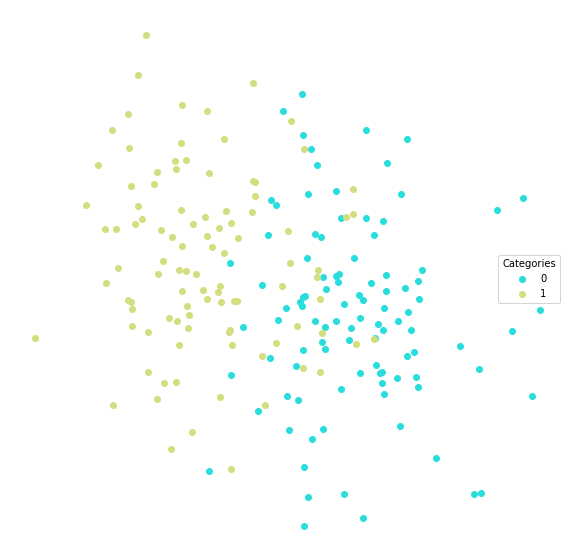

In [182]:
def plotter(df):
    fig, ax = plt.subplots(figsize = (10,10))
    pallet = seaborn.color_palette(palette='rainbow', n_colors= len(set(df['category'])))
    for i, cat in enumerate(set(df['category'])):
        a = np.stack(df[df['category'] == cat]['vect'])
        ax.scatter(a[:,0], a[:, 1], c = pallet[i], label = cat)
    ax.legend(loc = 'center right', title = 'Categories')
    ax.axis('off')
    plt.show()
    plt.close()
    
plotter(data)

In [183]:
from sklearn.svm import SVC, LinearSVC

In [184]:
svc = SVC(kernel = 'linear')
#sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)

In [185]:
X_train = np.stack(dfTrain['vect'], axis=0)
svc.fit(X_train, dfTrain['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(svc.predict(X_train), dfTrain['category'])

0.8733333333333333

In [187]:
svm = SVC(kernel = 'rbf', gamma='scale')
svm.fit(X_train, dfTrain['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [188]:
accuracy_score(svm.predict(X_train), dfTrain['category'])

0.8666666666666667

In [189]:
def plotregions(clf, df, h = .01):

    transformedDF = df
    catsMap = {c : i for i, c in enumerate(np.unique(df['category']))}

    fig, ax = plt.subplots(figsize = (6,6))
    ax.axis('off')
    pallet = seaborn.color_palette(palette='coolwarm', n_colors = len(set(transformedDF['category'])))

    if np.random.choice(df['vect']).shape[0] > 2:
        xx, yy = np.meshgrid(np.arange(1.1 * reduced_data[:,0].min(),
                1.1 * reduced_data[:,0].max(), h),
            np.arange(1.1 * reduced_data[:,1].min(),
                1.1 * reduced_data[:,1].max(), h))
        Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        reduced_data = np.stack(df['vect'], axis=0)
        xx, yy = np.meshgrid(np.arange(1.1 * reduced_data[:,0].min(),
                1.1 * reduced_data[:,0].max(), h),
            np.arange(1.1 * reduced_data[:,1].min(),
                1.1 * reduced_data[:,1].max(), h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.vectorize(lambda x: catsMap[x])(Z)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    for i, cat in enumerate(set(df['category'])):
        a = np.stack(transformedDF[transformedDF['category'] == cat]['vect'])
        ax.scatter(a[:,0], a[:, 1], c = pallet[catsMap[cat]], label = cat)
    ax.legend(loc = 'center right', title = 'Categories')
    plt.show()
    plt.close()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


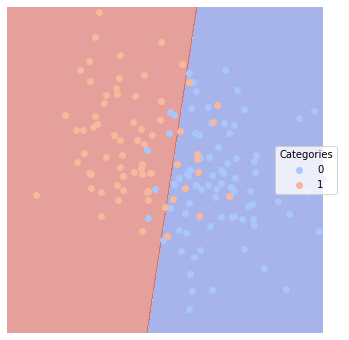

In [191]:
plotregions(svc, dfTrain)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


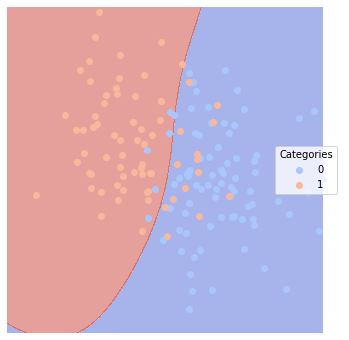

In [190]:
plotregions(svm, dfTrain)

In [193]:
X_test = np.stack(dfTest['vect'], axis=0)
print('svm', accuracy_score(svm.predict(X_test), dfTest['category']))
print('svc', accuracy_score(svc.predict(X_test), dfTest['category']))

svm 0.82
svc 0.82


Uhhhh that didn't do what I expected...

SVM vs. logistic regression
We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features. Your goal here is to compare different approaches to estimating non-linear decision boundaries, and thus assess the benefits and drawbacks of each.

2. (5 points) Generate a data set with $n = 500$ and $p = 2$, such that the observations belong to two classes with some overlapping, non-linear boundary between them.

3. (5 points) Plot the observations with colors according to their class labels ($y$). Your plot should display $X_1$ on the $x$-axis and $X_2$ on the $y$-axis.

4. (5 points) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.

5. (5 points) Obtain a predicted class label for each observation based on the logistic model previously fit. Plot the observations, colored according to the predicted class labels (the predicted decision boundary should look linear).

6. (5 points) Now fit a logistic regression model to the data, but this time using some non-linear function of both $X_1$ and $X_2$ as predictors (e.g. $X_1^2, X_1 \times X_2, \log(X_2)$, and so on).

7. (5 points) Now, obtain a predicted class label for each observation based on the fitted model with non-linear transformations of the $X$ features in the previous question. Plot the observations, colored according to the new predicted class labels from the non-linear model (the decision boundary should now be obviously non-linear). If it is not, then repeat earlier steps until you come up with an example in which the predicted class labels and the resultant decision boundary are clearly non-linear.

8. (5 points) Now, fit a support vector classifier (linear kernel) to the data with original $X_1$ and $X_2$ as predictors. Obtain a class prediction for each observation. Plot the observations, colored according to the predicted class labels.

9. (5 points) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each observation. Plot the observations, colored according to the predicted class labels.

10. (5 points) Discuss your results and specifically the tradeoffs between estimating non-linear decision boundaries using these two different approaches.

## Tuning cost
In class we learned that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now investigate that claim.

11. (5 points) Generate two-class data with $p=2$ in such a way that the classes are just barely linearly separable.

12. (5 points) Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are made for each value of cost considered, and how does this relate to the cross-validation errors obtained?

13. (5 points) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?

14. (5 points) Discuss your results.

## Application: Predicting attitudes towards racist college professors
In this problem set, you are going to return to the GSS question from last week and predict attitudes towards racist college professors. Recall, each respondent was asked "Should a person who believes that Blacks are genetically inferior be allowed to teach in a college or university?" Given the kerfuffle over Richard J. Herrnstein and Charles Murray's The Bell Curve and the ostracization of Nobel laureate James Watson over his controversial views on race and intelligence, this analysis will provide further insight into the public debate over this issue.

gss_*.csv contain a selection of features from the 2012 GSS. The outcome of interest colrac is a binary variable coded as either ALLOWED or NOT ALLOWED, where 1 = the racist professor should be allowed to teach, and 0 = the racist professor should not be allowed to teach. Documentation for the other predictors (if the variable is not clearly coded) can be viewed here. Some data pre-processing has been done in advance for you to ease your model fitting: (1) Missing values have been imputed; (2) Categorical variables with low-frequency classes had those classes collapsed into an "other" category; (3) Nominal variables with more than two classes have been converted to dummy variables; and (4) Remaining categorical variables have been converted to integer values, stripping their original labels.

This week, building on last week's problem set, you will approach this classification problem from an SVM-based framework.

15. (5 points) Fit a support vector classifier to predict colrac as a function of all available predictors, using 10-fold cross-validation to find an optimal value for cost. Report the CV errors associated with different values of cost, and discuss your results.

16. (15 points) Repeat the previous question, but this time using SVMs with radial and polynomial basis kernels, with different values for gamma and degree and cost. Present and discuss your results (e.g., fit, compare kernels, cost, substantive conclusions across fits, etc.).

In [195]:
gss_train = pd.read_csv('./data/gss_train.csv')

In [197]:
gss_train.head()

,age,attend,authoritarianism,black,born,childs,colath,colrac,colcom,colmil,...,partyid_3_Ind,partyid_3_Rep,relig_CATHOLIC,relig_NONE,relig_other,social_cons3_Mod,social_cons3_Conserv,spend3_Mod,spend3_Liberal,zodiac_other
0,21,0,4,0,0,0,1,1,0,1,...,1,0,1,0,0,1,0,0,0,1
1,42,0,4,0,0,2,0,1,1,0,...,1,0,0,0,0,0,0,1,0,1
2,70,1,1,1,0,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,35,3,2,0,0,2,0,1,0,1,...,1,0,0,0,1,0,0,0,1,1
4,24,3,6,0,1,3,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [198]:
X_train = gss_train.drop(['colrac'], axis=1) 
y_train = gss_train['colrac']

In [205]:
svc_linear = SVC(kernel = 'linear')
svc_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [206]:
from sklearn.model_selection import cross_val_score
accu = cross_val_score(svc_linear, X_train, 
                           y_train, scoring = 'accuracy', cv = 10)

In [207]:
accu

array([0.77852349, 0.81208054, 0.77852349, 0.85135135, 0.77027027,
       0.77702703, 0.7972973 , 0.82432432, 0.79591837, 0.75510204])

In [208]:
svm = SVC(kernel = 'rbf', gamma='scale')
svm.fit(X_train, y_train)
svm_score = cross_val_score(svc_linear, X_train, 
                           y_train, scoring = 'accuracy', cv = 10)
svm_score

array([0.77852349, 0.81208054, 0.77852349, 0.85135135, 0.77027027,
       0.77702703, 0.7972973 , 0.82432432, 0.79591837, 0.75510204])

In [212]:
svc_poly = SVC(kernel = 'poly', gamma='scale').fit(X_train, y_train)
svc_score= cross_val_score(svc_poly, X_train, 
                           y_train, scoring = 'accuracy', cv = 10)
svc_score

array([0.73825503, 0.79194631, 0.7114094 , 0.79054054, 0.76351351,
       0.73648649, 0.77027027, 0.74324324, 0.70748299, 0.70068027])

In [216]:
np.mean(svc_score)

0.745382805761521

In [ ]:
costs = enumerate([-5, 5])
for cost in costs:
    np.mean(svc_score)

In [ ]:

C = [0.1, 0.5, 1, 10, 15] 
for c in C:
    print('The cv error for C = {} is'.format(c),
          1 - np.mean(cross_val_score(SVC(C=c, kernel='linear'), X, y, cv=10, scoring='accuracy')))
    
    

/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


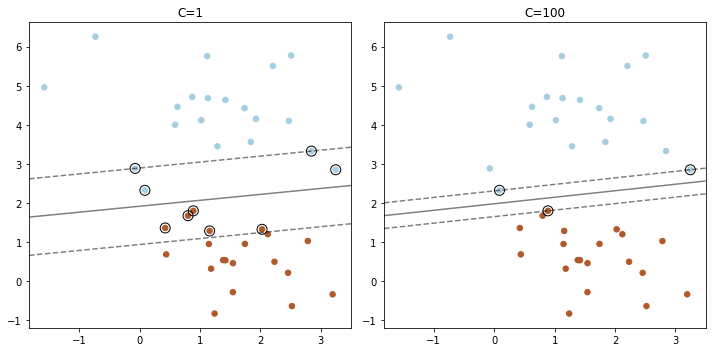

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()